In [1]:
# 导入必要的库
import dlib
import cv2
import matplotlib.pyplot as plt

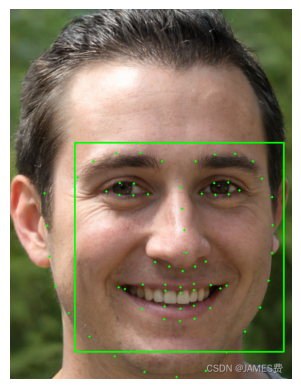

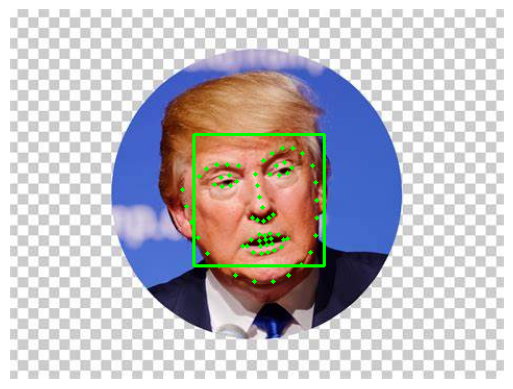

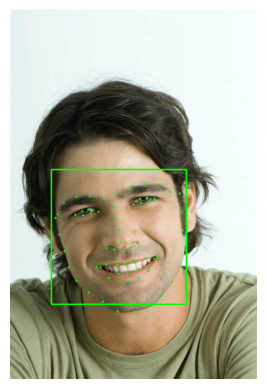

In [4]:
# 加载预训练模型
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

# 加载图像文件
def load_image(filepath):
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# 检测并标记人脸
def detect_and_display_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)
        x, y, w, h = (face.left(), face.top(), face.width(), face.height())
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

# 示例图片路径
image_paths = [
    '1.jpg',
    '2.jpg',
    '3.jpg'
]

# 加载并处理每张图片
for image_path in image_paths:
    image = load_image(image_path)
    detect_and_display_faces(image)


In [6]:
if not dlib.DLIB_USE_CUDA:
    print("Dlib没有使用CUDA。请确保Dlib是使用CUDA编译的。")

Dlib没有使用CUDA。请确保Dlib是使用CUDA编译的。


In [5]:
# 加载预训练模型
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

# 输入视频文件路径
video_path = '1.mp4'  # 替换为你的视频文件路径

# 初始化视频捕捉
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    while cap.isOpened():
        # 读取视频的帧
        ret, frame = cap.read()
        if not ret:
            break

        # 转换为灰度图像
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # 检测人脸
        faces = detector(gray, 1)  # 使用1表示更准确的检测

        # 在图像上绘制人脸矩形和标志点
        for face in faces:
            landmarks = predictor(gray, face)
            x, y, w, h = (face.left(), face.top(), face.width(), face.height())
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

            for n in range(0, 68):
                x = landmarks.part(n).x
                y = landmarks.part(n).y
                cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

        # 显示结果帧
        cv2.imshow('Face Recognition', frame)

        # 按 'q' 键退出
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # 释放视频捕捉和关闭窗口
    cap.release()
    cv2.destroyAllWindows()